## Investment Outcome 

In [137]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### 1. Data initialization

In [138]:
#load the data
name = input("Enter the name of the company").upper()
name

#taking the dataset 
df = pd.read_csv(f"../data-companywise/{name}.csv")
df

,date,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend
0,2022-01-02,540.0,565.0,534.2,549.0,0.73,15457.0,8417646.9,2022,0.18,3245.0,0.12,0.0
1,2022-01-03,545.0,559.0,539.0,544.0,-0.91,46593.0,25564459.0,2022,0.18,3245.0,0.12,0.0
2,2022-01-04,541.0,568.0,536.0,566.0,4.04,27443.0,15226271.3,2022,0.18,3245.0,0.12,0.0
3,2022-01-05,565.0,608.0,560.6,580.0,2.47,69522.0,40744392.3,2022,0.18,3245.0,0.12,0.0
4,2022-01-06,570.0,608.0,569.0,607.0,4.66,67178.0,40122758.1,2022,0.18,3245.0,0.12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,2026-01-14,550.0,557.0,547.2,547.9,-0.20,67358.0,37108884.5,2026,NaN,NaN,NaN,NaN
937,2026-01-18,545.0,555.0,545.0,551.0,0.57,54790.0,30227381.1,2026,NaN,NaN,NaN,NaN
938,2026-01-20,551.0,565.0,551.0,560.0,1.63,121694.0,68255750.2,2026,NaN,NaN,NaN,NaN
939,2026-01-21,571.0,571.0,558.3,560.0,0.00,87745.0,49327164.3,2026,NaN,NaN,NaN,NaN


In [139]:
df = df[(df['year'] >= 2022 ) & (df['year'] < 2026)].copy()

In [140]:
df

,date,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend
0,2022-01-02,540.0,565.0,534.2,549.0,0.73,15457.0,8417646.9,2022,0.18,3245.0,0.12,0.00
1,2022-01-03,545.0,559.0,539.0,544.0,-0.91,46593.0,25564459.0,2022,0.18,3245.0,0.12,0.00
2,2022-01-04,541.0,568.0,536.0,566.0,4.04,27443.0,15226271.3,2022,0.18,3245.0,0.12,0.00
3,2022-01-05,565.0,608.0,560.6,580.0,2.47,69522.0,40744392.3,2022,0.18,3245.0,0.12,0.00
4,2022-01-06,570.0,608.0,569.0,607.0,4.66,67178.0,40122758.1,2022,0.18,3245.0,0.12,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,2025-12-23,542.0,543.9,539.0,541.5,-0.42,44826.0,24255890.7,2025,23.88,28.5,13.63,22.11
924,2025-12-24,540.0,548.0,540.0,543.0,0.28,46386.0,25182227.2,2025,23.88,28.5,13.63,22.11
925,2025-12-28,549.9,555.0,546.1,553.6,1.95,54479.0,30018232.1,2025,23.88,28.5,13.63,22.11
926,2025-12-29,553.6,562.9,550.4,551.0,-0.47,50747.0,28133245.9,2025,23.88,28.5,13.63,22.11


In [141]:
#view first rows
df.head()

,date,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend
0,2022-01-02,540.0,565.0,534.2,549.0,0.73,15457.0,8417646.9,2022,0.18,3245.0,0.12,0.0
1,2022-01-03,545.0,559.0,539.0,544.0,-0.91,46593.0,25564459.0,2022,0.18,3245.0,0.12,0.0
2,2022-01-04,541.0,568.0,536.0,566.0,4.04,27443.0,15226271.3,2022,0.18,3245.0,0.12,0.0
3,2022-01-05,565.0,608.0,560.6,580.0,2.47,69522.0,40744392.3,2022,0.18,3245.0,0.12,0.0
4,2022-01-06,570.0,608.0,569.0,607.0,4.66,67178.0,40122758.1,2022,0.18,3245.0,0.12,0.0


In [142]:
df.tail()

,date,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend
923,2025-12-23,542.0,543.9,539.0,541.5,-0.42,44826.0,24255890.7,2025,23.88,28.5,13.63,22.11
924,2025-12-24,540.0,548.0,540.0,543.0,0.28,46386.0,25182227.2,2025,23.88,28.5,13.63,22.11
925,2025-12-28,549.9,555.0,546.1,553.6,1.95,54479.0,30018232.1,2025,23.88,28.5,13.63,22.11
926,2025-12-29,553.6,562.9,550.4,551.0,-0.47,50747.0,28133245.9,2025,23.88,28.5,13.63,22.11
927,2025-12-31,551.0,557.8,551.0,552.0,0.18,64377.0,35693047.7,2025,23.88,28.5,13.63,22.11


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 927
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              928 non-null    object 
 1   open              928 non-null    float64
 2   high              928 non-null    float64
 3   low               928 non-null    float64
 4   close             928 non-null    float64
 5   price_change_pct  928 non-null    float64
 6   volume            928 non-null    float64
 7   turnover          928 non-null    float64
 8   year              928 non-null    int64  
 9   eps               928 non-null    float64
 10  pe-ratio          928 non-null    float64
 11  roe               928 non-null    float64
 12  dividend          928 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 101.5+ KB


In [144]:
#setting date as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace = True)
df

,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend
date,,,,,,,,,,,,
2022-01-02,540.0,565.0,534.2,549.0,0.73,15457.0,8417646.9,2022,0.18,3245.0,0.12,0.00
2022-01-03,545.0,559.0,539.0,544.0,-0.91,46593.0,25564459.0,2022,0.18,3245.0,0.12,0.00
2022-01-04,541.0,568.0,536.0,566.0,4.04,27443.0,15226271.3,2022,0.18,3245.0,0.12,0.00
2022-01-05,565.0,608.0,560.6,580.0,2.47,69522.0,40744392.3,2022,0.18,3245.0,0.12,0.00
2022-01-06,570.0,608.0,569.0,607.0,4.66,67178.0,40122758.1,2022,0.18,3245.0,0.12,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-23,542.0,543.9,539.0,541.5,-0.42,44826.0,24255890.7,2025,23.88,28.5,13.63,22.11
2025-12-24,540.0,548.0,540.0,543.0,0.28,46386.0,25182227.2,2025,23.88,28.5,13.63,22.11
2025-12-28,549.9,555.0,546.1,553.6,1.95,54479.0,30018232.1,2025,23.88,28.5,13.63,22.11


In [145]:
#getting the date range
print(f"Date range: {df.index.min() } to {df.index.max()}")


Date range: 2022-01-02 00:00:00 to 2025-12-31 00:00:00


In [146]:
df.duplicated().sum()

2

In [147]:
df.shape

(928, 12)

In [148]:
df.columns

Index(['open', 'high', 'low', 'close', 'price_change_pct', 'volume',
       'turnover', 'year', 'eps', 'pe-ratio', 'roe', 'dividend'],
      dtype='object')

### 2. checking the missing value

In [149]:
#missing value count
df.isna().sum()

#no missing

open                0
high                0
low                 0
close               0
price_change_pct    0
volume              0
turnover            0
year                0
eps                 0
pe-ratio            0
roe                 0
dividend            0
dtype: int64

In [150]:
#sorting the index
df = df.sort_index()


# check for duplicated index
duplicate_index = df.index.duplicated().sum()
print(f"✓ Duplicate dates: {duplicate_index}")

#Remove duplicates if any
if duplicate_index > 0:
    df = df[~df.index.duplicated(keep='first')]
    print("✓ Removed duplicate dates")

print(f"\nFinal Shape: {df.shape}")

✓ Duplicate dates: 2
✓ Removed duplicate dates

Final Shape: (926, 12)


### 3. Created the derived feature from date_index

In [151]:
#daily return
df['daily_return'] = df['close'].pct_change() *100


#gain/loss indicator
df['is_gain'] = df['close'] > df['open']

#removing the nan value
df.dropna(subset = ['daily_return'],inplace = True)

df[['daily_return','is_gain']]



,daily_return,is_gain
date,,
2022-01-03,-0.910747,False
2022-01-04,4.044118,True
2022-01-05,2.473498,True
2022-01-06,4.655172,True
2022-01-09,3.130148,True
...,...,...
2025-12-23,-0.422950,False
2025-12-24,0.277008,True
2025-12-28,1.952118,True


### 4. Statistics

In [152]:
print("BASIC DESCRIPTIVE STATS")

#overall stat
print("\n Overall Stat")
print(df.describe())

#price statistics
print("\n Price statistics")
print(df[['open', 'high', 'low', 'close']].describe())

# Volume statistics
print("\nVolume Statistics:")
print(df[['volume', 'turnover']].describe())

# Financial metrics
print("\nFinancial Metrics:")
print(df[['eps', 'pe-ratio', 'roe', 'dividend']].describe())

BASIC DESCRIPTIVE STATS

 Overall Stat
             open        high         low       close  price_change_pct  \
count  925.000000  925.000000  925.000000  925.000000        925.000000   
mean   529.920800  541.551676  522.171568  531.235384          0.054378   
std     68.616269   69.853137   66.565652   67.265316          2.244775   
min    385.200000  411.000000  377.500000  393.000000         -6.770000   
25%    487.000000  498.000000  480.000000  488.500000         -1.230000   
50%    520.000000  530.000000  514.000000  521.000000         -0.190000   
75%    566.000000  577.000000  555.000000  566.000000          1.040000   
max    734.400000  734.400000  700.000000  720.000000          9.990000   

             volume      turnover         year         eps     pe-ratio  \
count  9.250000e+02  9.250000e+02   925.000000  925.000000   925.000000   
mean   7.642166e+04  4.354530e+07  2023.476757    8.859416   915.016108   
std    1.220670e+05  7.112347e+07     1.121779    9.121979  

In [153]:
#advanced Stat

returns = df['daily_return'].dropna()
print("\nDaily Returns Statistics:")
print(f"  Mean: {returns.mean():.4f}%")
print(f"  Median: {returns.median():.4f}%")
print(f"  Std Dev (Volatility): {returns.std():.4f}%")
print(f"  Variance: {returns.var():.4f}")
print(f"  Skewness: {returns.skew():.4f}")
print(f"  Kurtosis: {returns.kurtosis():.4f}")
print(f"  Min: {returns.min():.4f}%")
print(f"  Max: {returns.max():.4f}%")



Daily Returns Statistics:
  Mean: 0.0278%
  Median: -0.1862%
  Std Dev (Volatility): 2.3358%
  Variance: 5.4561
  Skewness: 0.2122
  Kurtosis: 4.6319
  Min: -16.3542%
  Max: 9.9946%


### 5. Outlier detection

In [154]:
print("OUTLIER DETECTION")

# IQR method
Q1 = df['daily_return'].quantile(0.25)
Q3 = df['daily_return'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['daily_return'] < lower_bound) | (df['daily_return'] > upper_bound)]

print(f"\nDaily Returns Outliers:")
print(f"  Lower bound: {lower_bound:.2f}%")
print(f"  Upper bound: {upper_bound:.2f}%")
print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

if len(outliers) > 0:
    print(f"\n  Top 5 outliers:")
    print(outliers.nlargest(5, 'daily_return')[['close', 'daily_return', 'volume']])


OUTLIER DETECTION

Daily Returns Outliers:
  Lower bound: -4.66%
  Upper bound: 4.45%
  Number of outliers: 58 (6.27%)

  Top 5 outliers:
            close  daily_return    volume
date                                     
2024-07-23  606.4      9.994558  251542.0
2025-01-06  504.4      8.706897  275791.0
2024-07-24  657.7      8.459763  225133.0
2022-06-26  435.0      7.940447   24252.0
2023-05-17  527.0      7.881269   12115.0


### 6. Distribution analysis

In [155]:
print("DISTRIBUTION ANALYSIS")


# Price distribution
print("\nClose Price Distribution:")
print(f"  Mean: {df['close'].mean():.2f}")
print(f"  Median: {df['close'].median():.2f}")
print(f"  Mode: {df['close'].mode()[0]:.2f}")

# Returns distribution
positive_days = (df['daily_return'] > 0).sum()
negative_days = (df['daily_return'] < 0).sum()
neutral_days = (df['daily_return'] == 0).sum()

print(f"\nDaily Returns Distribution:")
print(f"  Positive days: {positive_days}")
print(f"  Negative days: {negative_days}")
print(f"  Neutral days: {neutral_days}")


DISTRIBUTION ANALYSIS

Close Price Distribution:
  Mean: 531.24
  Median: 521.00
  Mode: 515.00

Daily Returns Distribution:
  Positive days: 401
  Negative days: 506
  Neutral days: 18


<Figure size 640x480 with 0 Axes>

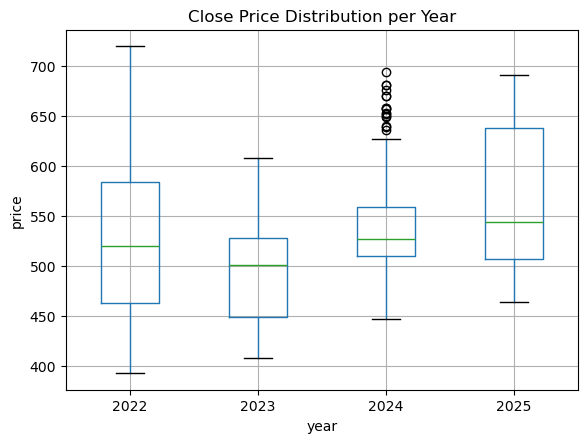

In [156]:
#box plot to detect the outlier
plt.figure()

df.boxplot(column='close', by='year')

plt.xlabel("year")
plt.ylabel("price")
plt.title("Close Price Distribution per Year")
plt.suptitle("")

plt.show()



In [157]:
# Normality test
statistic, p_value = stats.normaltest(df['close'].dropna())
print(f"\nNormality Test (Close Price):")
print(f"  Statistic: {statistic:.4f}")
print(f"  P-value: {p_value:.4f}")
print(f"  Is Normal? {'Yes' if p_value > 0.05 else 'No'}")


Normality Test (Close Price):
  Statistic: 36.5277
  P-value: 0.0000
  Is Normal? No


### 7. Setup initial investment

In [158]:
#input the entry date
entry_date_str = input("\nEnter investment date (YYYY-MM-DD): ")
entry_date = pd.to_datetime(entry_date_str)
entry_date


# User input 2: How much money do you have?
initial_investment = float(input("Enter investment amount (NPR): "))
# Example: 100000

# User input 3: When do you want to exit?
exit_date_str = input("Enter exit date (YYYY-MM-DD) [default: 2025-12-31]: ")
if exit_date_str == '':
    exit_date_str = '2025-12-31'
exit_date = pd.to_datetime(exit_date_str)

print(f"\n✓ You want to invest on: {entry_date.date()}")
print(f"✓ You have: NPR {initial_investment:,.2f}")
print(f"✓ You want to exit on: {exit_date.date()}")


✓ You want to invest on: 2025-01-01
✓ You have: NPR 50,000.00
✓ You want to exit on: 2025-12-31


### 8. Find the historical prices

In [159]:

# Find entry price from historical data
if entry_date not in df.index:
    entry_date = df.index[df.index >= entry_date][0]
    print(f"\n⚠️  Adjusted to next trading day: {entry_date.date()}")

entry_price = df.loc[entry_date, 'close']
print(f"\n📈 Stock price on {entry_date.date()}: NPR {entry_price:.2f}")

# Find exit price from historical data
if exit_date not in df.index:
    exit_date = df.index[df.index <= exit_date][-1]
    print(f"⚠️  Adjusted to last trading day: {exit_date.date()}")

exit_price = df.loc[exit_date, 'close']
print(f"📈 Stock price on {exit_date.date()}: NPR {exit_price:.2f}")


📈 Stock price on 2025-01-01: NPR 466.00
📈 Stock price on 2025-12-31: NPR 552.00


### 9. Share calculation

In [160]:

# Calculate shares you can buy with your money
shares_owned = initial_investment / entry_price

print(f"\n🛒 SHARE PURCHASE CALCULATION")
print(f"  Your money: NPR {initial_investment:,.2f}")
print(f"  Price per share: NPR {entry_price:.2f}")
print(f"  Shares you can buy: {shares_owned:.0f}")


🛒 SHARE PURCHASE CALCULATION
  Your money: NPR 50,000.00
  Price per share: NPR 466.00
  Shares you can buy: 107


In [161]:

# Get investment period data
investment_period = df.loc[entry_date:exit_date].copy()
holding_days = len(investment_period)
years_held = (exit_date - entry_date).days / 365.25

print(f"\n⏱️  HOLDING PERIOD")
print(f"  From: {entry_date.date()}")
print(f"  To: {exit_date.date()}")
print(f"  Days: {holding_days}")
print(f"  Years: {years_held:.1f}")


⏱️  HOLDING PERIOD
  From: 2025-01-01
  To: 2025-12-31
  Days: 225
  Years: 1.0


### 10. Total dividend payout

In [162]:
 #Calculate Total Dividends (2022 - 2025)
# We take the first dividend entry for each year to represent that year's payout
yearly_divs = df[df['year'].isin([2022, 2023, 2024, 2025])].groupby('year')['dividend'].first()
total_div_per_share = yearly_divs.sum()
total_dividends_received = shares_owned * total_div_per_share
print(f"{total_dividends_received:.2f}")

3275.75


### 11. Final return calculation

In [163]:
# 5. Final Calculations
final_stock_value = shares_owned * exit_price
total_portfolio_value = final_stock_value + total_dividends_received
total_return_pct = ((total_portfolio_value - initial_investment) / initial_investment) * 100

# Print Step-wise Results
print(f"Shares Bought: {shares_owned:.0f}")
print(f"Dividend per Share: NPR {total_div_per_share:.2f}")
print(f"Total Dividend Income: NPR {total_dividends_received:.2f}")
print(f"Final Portfolio Value: NPR {total_portfolio_value:.2f}")
print(f"Total Return: {total_return_pct:.2f}%")

Shares Bought: 107
Dividend per Share: NPR 30.53
Total Dividend Income: NPR 3275.75
Final Portfolio Value: NPR 62503.22
Total Return: 25.01%


In [164]:
#done upto total return calculation no visualization added

### 12. Visualizations

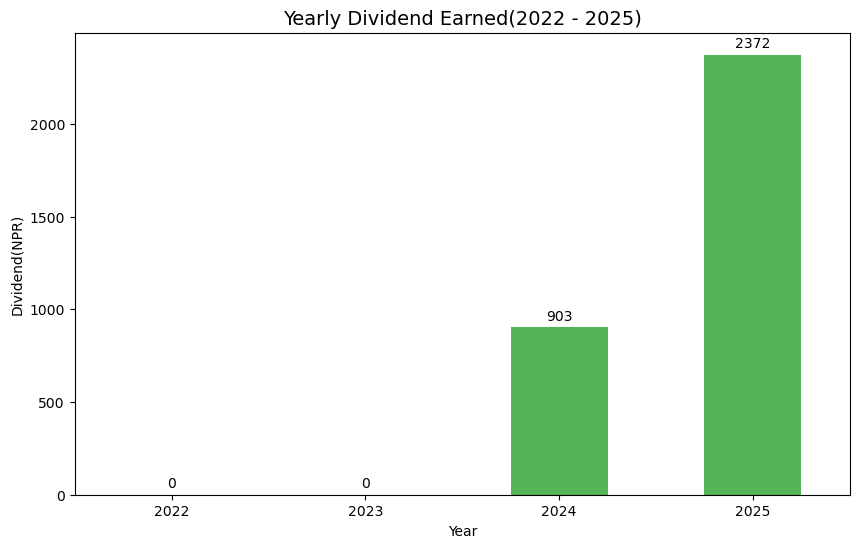

In [165]:
# Visualize Yearly Dividend Income
plt.figure(figsize=(10, 6))
yearly_income = yearly_divs * shares_owned
ax = yearly_income.plot(kind='bar', color='#2ca02c', alpha=0.8)
plt.title('Yearly Dividend Earned(2022 - 2025)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Dividend(NPR)')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)
plt.show()

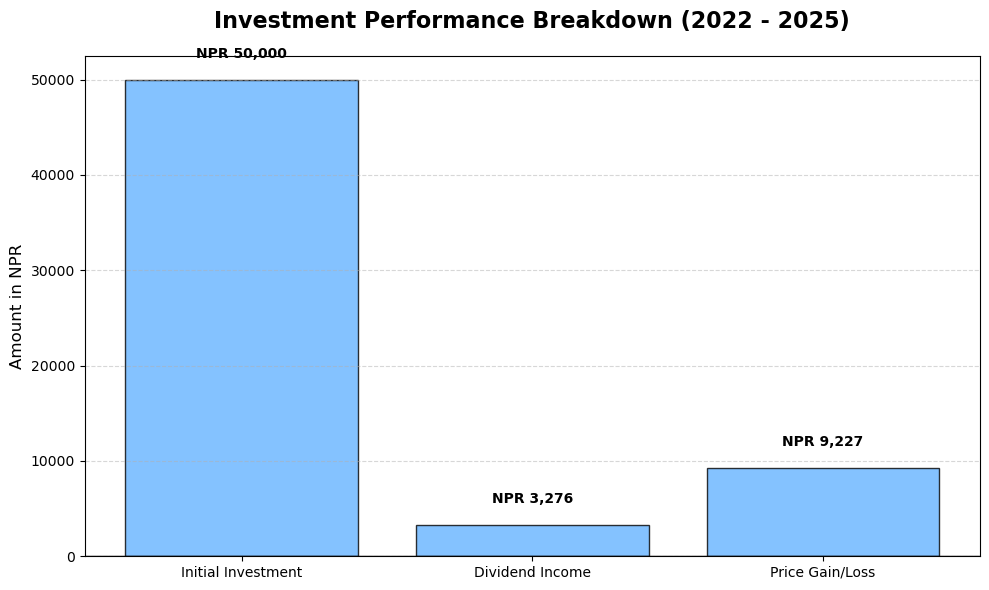

In [166]:
#composition of final portfolio

price_gain = final_stock_value - initial_investment

# 3. Preparation for Visualization
labels = ['Initial Investment', 'Dividend Income', 'Price Gain/Loss']
values = [initial_investment, total_dividends_received, price_gain]

# 4. Create the Visualization
plt.figure(figsize=(10, 6))

# Assign colors: Red for negative values, Green/Blue for positive
colors = []
for v in values:
    if v < 0:
        colors.append('#ff4d4d') # Strong Red for Loss
    else:
        colors.append('#66b3ff') # Blue for positive components

bars = plt.bar(labels, values, color=colors, edgecolor='black', alpha=0.8)

# Add clear labeling with conditional colors
for bar in bars:
    yval = bar.get_height()
    # Position text above for positive, below for negative
    va_type = 'bottom' if yval >= 0 else 'top'
    offset = 2000 if yval >= 0 else -8000
    
    label_color = 'red' if yval < 0 else 'black'
    plt.text(bar.get_x() + bar.get_width()/2, yval + offset, 
             f'NPR {yval:,.0f}', ha='center', va=va_type, 
             fontweight='bold', color=label_color)

# Add a reference line at Zero
plt.axhline(0, color='black', linewidth=1)

plt.title('Investment Performance Breakdown (2022 - 2025)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Amount in NPR', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


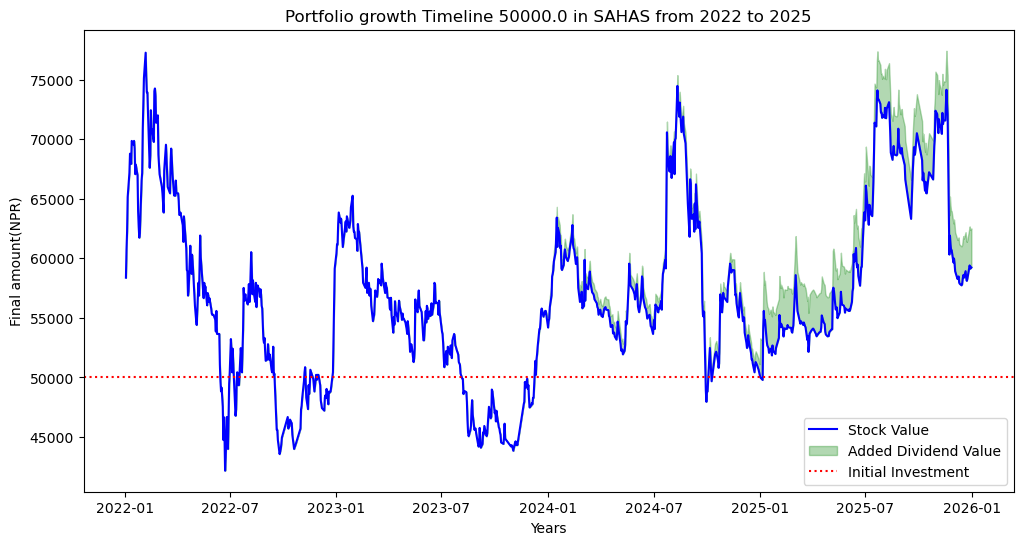

In [167]:
#portfolio growth timeline
# Extract yearly dividends using your logic
plt.figure(figsize=(12, 6))
yearly_divs = df[df['year'].isin([2022, 2023, 2024, 2025])].groupby('year')['dividend'].first()

df['stock_value'] = df['close'] * shares_owned
# Calculate the 'Total Portfolio Value' by adding cumulative dividends to market value
df['cum_div_received'] = df['year'].map(yearly_divs.cumsum()) * shares_owned
df['total_portfolio_value'] = df['stock_value'] + df['cum_div_received']

# Plotting the 'Jagged' style Area Chart
plt.plot(df.index, df['stock_value'], label='Stock Value', color='blue')
plt.fill_between(df.index, df['stock_value'], df['total_portfolio_value'], color='green', alpha=0.3, label='Added Dividend Value')
plt.axhline(y=initial_investment, color='red', linestyle=':', label='Initial Investment')
plt.title(f"Portfolio growth Timeline {initial_investment} in {name} from 2022 to 2025")
plt.xlabel("Years")
plt.ylabel("Final amount(NPR)")
plt.legend()
plt.show()

In [168]:
df

,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend,daily_return,is_gain,stock_value,cum_div_received,total_portfolio_value
date,,,,,,,,,,,,,,,,,
2022-01-03,545.0,559.0,539.0,544.0,-0.91,46593.0,25564459.0,2022,0.18,3245.0,0.12,0.00,-0.910747,False,58369.098712,0.000000,58369.098712
2022-01-04,541.0,568.0,536.0,566.0,4.04,27443.0,15226271.3,2022,0.18,3245.0,0.12,0.00,4.044118,True,60729.613734,0.000000,60729.613734
2022-01-05,565.0,608.0,560.6,580.0,2.47,69522.0,40744392.3,2022,0.18,3245.0,0.12,0.00,2.473498,True,62231.759657,0.000000,62231.759657
2022-01-06,570.0,608.0,569.0,607.0,4.66,67178.0,40122758.1,2022,0.18,3245.0,0.12,0.00,4.655172,True,65128.755365,0.000000,65128.755365
2022-01-09,610.0,655.8,610.0,626.0,3.13,70612.0,44462698.0,2022,0.18,3245.0,0.12,0.00,3.130148,True,67167.381974,0.000000,67167.381974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-23,542.0,543.9,539.0,541.5,-0.42,44826.0,24255890.7,2025,23.88,28.5,13.63,22.11,-0.422950,False,58100.858369,3275.751073,61376.609442
2025-12-24,540.0,548.0,540.0,543.0,0.28,46386.0,25182227.2,2025,23.88,28.5,13.63,22.11,0.277008,True,58261.802575,3275.751073,61537.553648
2025-12-28,549.9,555.0,546.1,553.6,1.95,54479.0,30018232.1,2025,23.88,28.5,13.63,22.11,1.952118,True,59399.141631,3275.751073,62674.892704


In [169]:
df.columns

Index(['open', 'high', 'low', 'close', 'price_change_pct', 'volume',
       'turnover', 'year', 'eps', 'pe-ratio', 'roe', 'dividend',
       'daily_return', 'is_gain', 'stock_value', 'cum_div_received',
       'total_portfolio_value'],
      dtype='object')

In [170]:
df

,open,high,low,close,price_change_pct,volume,turnover,year,eps,pe-ratio,roe,dividend,daily_return,is_gain,stock_value,cum_div_received,total_portfolio_value
date,,,,,,,,,,,,,,,,,
2022-01-03,545.0,559.0,539.0,544.0,-0.91,46593.0,25564459.0,2022,0.18,3245.0,0.12,0.00,-0.910747,False,58369.098712,0.000000,58369.098712
2022-01-04,541.0,568.0,536.0,566.0,4.04,27443.0,15226271.3,2022,0.18,3245.0,0.12,0.00,4.044118,True,60729.613734,0.000000,60729.613734
2022-01-05,565.0,608.0,560.6,580.0,2.47,69522.0,40744392.3,2022,0.18,3245.0,0.12,0.00,2.473498,True,62231.759657,0.000000,62231.759657
2022-01-06,570.0,608.0,569.0,607.0,4.66,67178.0,40122758.1,2022,0.18,3245.0,0.12,0.00,4.655172,True,65128.755365,0.000000,65128.755365
2022-01-09,610.0,655.8,610.0,626.0,3.13,70612.0,44462698.0,2022,0.18,3245.0,0.12,0.00,3.130148,True,67167.381974,0.000000,67167.381974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-23,542.0,543.9,539.0,541.5,-0.42,44826.0,24255890.7,2025,23.88,28.5,13.63,22.11,-0.422950,False,58100.858369,3275.751073,61376.609442
2025-12-24,540.0,548.0,540.0,543.0,0.28,46386.0,25182227.2,2025,23.88,28.5,13.63,22.11,0.277008,True,58261.802575,3275.751073,61537.553648
2025-12-28,549.9,555.0,546.1,553.6,1.95,54479.0,30018232.1,2025,23.88,28.5,13.63,22.11,1.952118,True,59399.141631,3275.751073,62674.892704
